# **Assignment 2**

**Team details:**
*  Nitish Bhardwaj:        B00811535
* Jessica Castelino:     B00804805

In [0]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
sns.set(style='whitegrid', color_codes=True)
from matplotlib import rcParams
import nltk
from nltk.tokenize import RegexpTokenizer
import string
from nltk.corpus import stopwords
import re

In [0]:
#Formatting the print statements [1]
class style:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# Q1. Collocation extracton

---



**1) a) Tokenize this corpus and perform part-of-speech tagging on it.**

In [0]:
#Download NLTK data

nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download("genesis")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package genesis to /root/nltk_data...
[nltk_data]   Unzipping corpora/genesis.zip.


True

#20 newsgroup dataset

---



The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). For this assignment, we have used both the subsets and while removing headers, signature blocks, and quotation blocks from the articles.


Sources: https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html

In [0]:
#Specify the categories required in the dataset
required_categories=['alt.atheism','talk.religion.misc','comp.graphics', 'sci.space']

#Load the entire dataset
dataset = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), shuffle=True,  categories=required_categories, random_state=42)


In [0]:
#Print the first file in the dataset
print(style.BOLD+style.UNDERLINE+"First file in the dataset"+style.END)
print(dataset.data[0])

First file in the dataset
My point is that you set up your views as the only way to believe.  Saying 
that all eveil in this world is caused by atheism is ridiculous and 
counterproductive to dialogue in this newsgroups.  I see in your posts a 
spirit of condemnation of the atheists in this newsgroup bacause they don'
t believe exactly as you do.  If you're here to try to convert the atheists 
here, you're failing miserably.  Who wants to be in position of constantly 
defending themselves agaist insulting attacks, like you seem to like to do?!
I'm sorry you're so blind that you didn't get the messgae in the quote, 
everyone else has seemed to.


In [0]:
#Fetch the stop words in English
stopword_list = stopwords.words('english')

#Function to tokenize each news article [2]
def tokenize (article):
    tokens = [word.strip(string.punctuation) for word in RegexpTokenizer(r'\b[a-zA-Z][a-zA-Z0-9]{2,14}\b').tokenize(article)]
    return  [token.lower() for token in tokens if token and token.lower() not in stopword_list]

#Initialize empty lists
token_list, pos_list  = [],[]

#Loop through the dataset
for i, news in enumerate(dataset['data']):
  #tokenize each article
  tokens = tokenize (news)
  if (len(tokens)!=0):
    #Store tokens in list
    token_list.append(tokens)
    #Perform POS tagging and store in list
    pos_list.append(nltk.pos_tag(tokens))

In [0]:
#Printing the tokens in each news article 
print(style.BOLD+style.UNDERLINE+"Tokens:"+style.END)
count=0
for tokens in token_list[:10]:
  print(style.BOLD+"Article "+str(count)+style.END)
  print(*tokens, sep=',')
  count=count+1

Tokens:
Article 0
point,set,views,way,believe,saying,eveil,world,caused,atheism,ridiculous,dialogue,newsgroups,see,posts,spirit,condemnation,atheists,newsgroup,bacause,believe,exactly,try,convert,atheists,failing,miserably,wants,position,constantly,defending,agaist,insulting,attacks,like,seem,like,sorry,blind,get,messgae,quote,everyone,else,seemed
Article 1
grey,level,images,mean,items,images,work,work,screen,screen,intensity,non,linear,bit,per,pixel,could,timing,gives,levels,linear,screen,intensity,linear,works,find,best,compinations,levels,choises,best,must,chosen,different,compinations,level,varies,bit,levels,keeps,order,readers,verify,wrote
Article 2
first,annual,phigs,user,group,conference,first,annual,phigs,user,group,conference,held,march,orlando,florida,conference,organized,rensse,laer,design,research,center,operation,ieee,sig,graph,attendees,came,five,countries,spanning,three,con,tinents,good,cross,section,phigs,community,represented,conference,participants,including,phigs,use

In [0]:
#Printing the POS tag for each token in each news article 
print(style.BOLD+style.UNDERLINE+"POS tagging:"+style.END)
count=0
for item in pos_list[:10]:
  print(style.BOLD+"Article "+str(count)+style.END)
  print(*item, sep=',')
  count=count+1

POS tagging:
Article 0
('point', 'NN'),('set', 'VBN'),('views', 'NNS'),('way', 'NN'),('believe', 'VBP'),('saying', 'VBG'),('eveil', 'JJ'),('world', 'NN'),('caused', 'VBD'),('atheism', 'NN'),('ridiculous', 'JJ'),('dialogue', 'NN'),('newsgroups', 'NNS'),('see', 'VBP'),('posts', 'NNS'),('spirit', 'VBP'),('condemnation', 'NN'),('atheists', 'NNS'),('newsgroup', 'VBP'),('bacause', 'IN'),('believe', 'VBP'),('exactly', 'RB'),('try', 'VBP'),('convert', 'JJ'),('atheists', 'NNS'),('failing', 'VBG'),('miserably', 'RB'),('wants', 'VBZ'),('position', 'NN'),('constantly', 'RB'),('defending', 'VBG'),('agaist', 'NN'),('insulting', 'VBG'),('attacks', 'NNS'),('like', 'IN'),('seem', 'VBP'),('like', 'IN'),('sorry', 'NN'),('blind', 'VBP'),('get', 'VB'),('messgae', 'JJ'),('quote', 'NN'),('everyone', 'NN'),('else', 'RB'),('seemed', 'VBD')
Article 1
('grey', 'JJ'),('level', 'NN'),('images', 'NNS'),('mean', 'VBP'),('items', 'NNS'),('images', 'NNS'),('work', 'VBP'),('work', 'NN'),('screen', 'NN'),('screen', 'JJ'

**1) b) Apply the techniques described in Tutorial 6 (Frequency with filter, PMI, T-test with filter, Chi-Sq test) to extract bigram collocations from the corpus. Show the top 20 results of each technique.**

***(i) Frequency Filter***

It simply orders the bigrams by frequency

In [0]:
#Function to filter for ADJ/NN bigrams [3]
def rightTypes(ngram):
    if '-pron-' in ngram or '' in ngram or ' 'in ngram or 't' in ngram:
        return False
    for word in ngram:
        if word in stopword_list:
            return False
    acceptable_types = ('JJ', 'JJR', 'JJS', 'JJT', 'NN', 'NNS', 'NNP', 'NNPS')
    second_type = ('NN', 'NNS', 'NNP', 'NNPS')
    tags = nltk.pos_tag(ngram)
    if tags[0][1] in acceptable_types and tags[1][1] in second_type:
        return True
    else:
        return False

In [0]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()

bigram_freq_collocation_list=[]

#Go through every article of dataset and find the bigram collocations from every article
for i, article in enumerate(dataset.data):
  finder = BigramCollocationFinder.from_words(tokenize(article))
  
  #Append the bigram collocations in a list
  for item in finder.ngram_fd.items():
    bigram_freq_collocation_list.append(item)
bigramFreqTable = pd.DataFrame(list(bigram_freq_collocation_list), columns=['Frequency_with_Filter_Bigram_Collocations','Frequency']).sort_values(by='Frequency', ascending=False)
filtered_bi = bigramFreqTable[bigramFreqTable.Frequency_with_Filter_Bigram_Collocations.map(lambda x: rightTypes(x))]
filtered_bi[:20]

,Frequency_with_Filter_Bigram_Collocations,Frequency
181666,"(lord, jehovah)",92
181399,"(god, elohim)",47
40220,"(solar, system)",43
61099,"(edu, pub)",26
299398,"(edu, pub)",26
245201,"(access, bus)",26
34371,"(gamma, correction)",26
41076,"(kilometers, miles)",23
47090,"(row, col)",23
149942,"(physical, universe)",23


***(ii) Pointwise Mutual Information (PMI)***

It measures how much more likely the words co-occur than if they were independent. However, it is very sensitive to rare combination of words.



In [0]:
bigram_pmi_collocation_list=[]

#Go through every article of dataset and find the bigram collocations from every article
for i, article in enumerate(dataset.data):
  finder = BigramCollocationFinder.from_words(tokenize(article))
  finder.apply_freq_filter(3)
  
  #Append the bigram collocations in a list
  for item in finder.score_ngrams(bigram_measures.pmi):
    bigram_pmi_collocation_list.append(item)
    
#Sorting and printing the top 20 in the list[2]
bigramPMITable = pd.DataFrame(list(bigram_pmi_collocation_list), columns=['PMI_Bigram_Collocations','PMI']).sort_values(by='PMI', ascending=False)
filtered_pmi = bigramPMITable[bigramPMITable.PMI_Bigram_Collocations.map(lambda x: rightTypes(x))]
filtered_pmi[:20]

,PMI_Bigram_Collocations,PMI
1333,"(virtual, reality)",10.966025
6731,"(ccu1, aukland)",10.943736
6733,"(virtual, reality)",10.943736
6889,"(payload, doors)",10.787903
651,"(payload, doors)",10.787903
887,"(kilograms, pounds)",10.773963
1335,"(cquel, byu)",10.550987
1334,"(bobsbox, rent)",10.550987
6735,"(cquel, byu)",10.528698
6734,"(bobsbox, rent)",10.528698


***(iii) T-Test***

It is a type of hypothesis testing which measures the confidence that bigrams occured because of a variable and not by chance.

In [0]:
bigram_t_collocation_list=[]

#Go through every article of dataset and find the bigram collocations from every article
for i, article in enumerate(dataset.data):
  finder = BigramCollocationFinder.from_words(tokenize(article))
  finder.apply_freq_filter(3)
  
  #Append the bigram collocations in a list
  for item in finder.score_ngrams(bigram_measures.student_t):
    bigram_t_collocation_list.append(item)
bigramTtable = pd.DataFrame(list(bigram_t_collocation_list), columns=['T_Test_Bigram_Collocations','t']).sort_values(by='t', ascending=False)
filtered_t = bigramTtable[bigramTtable.T_Test_Bigram_Collocations.map(lambda x: rightTypes(x))]
filtered_t[:20]

,T_Test_Bigram_Collocations,t
1897,"(lord, jehovah)",8.871737
453,"(solar, system)",6.471631
1898,"(god, elohim)",6.220656
3101,"(edu, pub)",4.796530
654,"(edu, pub)",4.790663
454,"(kilometers, miles)",4.762310
377,"(gamma, correction)",4.709667
1585,"(physical, universe)",4.690865
2590,"(physical, universe)",4.688701
2578,"(access, bus)",4.671877


***(iv) Chi-squared Test***

The chi-square test assumes in the null hypothesis that words are independent. It does not assume that the probabilities are normally distributed, as assumed by t-test.

In [0]:
bigram_chi_collocation_list=[]

#Go through every article of dataset and find the bigram collocations from every article
for i, article in enumerate(dataset.data):
  finder = BigramCollocationFinder.from_words(tokenize(article))
  finder.apply_freq_filter(3)
  
  #Append the bigram collocations in a list
  for item in finder.score_ngrams(bigram_measures.chi_sq):
    bigram_chi_collocation_list.append(item)
    
bigramChiTable = pd.DataFrame(list(bigram_chi_collocation_list), columns=['Chi_Square_Bigram_Collocations','Chi-Squared']).sort_values(by='Chi-Squared', ascending=False)
filtered_chi = bigramChiTable[bigramChiTable.Chi_Square_Bigram_Collocations.map(lambda x: rightTypes(x))]
filtered_chi[:20]

,Chi_Square_Bigram_Collocations,Chi-Squared
655,"(pit, manager)",5953.0
656,"(virtual, reality)",5953.0
3103,"(pit, manager)",5861.0
3104,"(virtual, reality)",5861.0
3101,"(ccu1, aukland)",5861.0
2271,"(sumex, aim)",5414.0
2270,"(physik, unizh)",5414.0
2269,"(news, answers)",5414.0
2268,"(aim, stanford)",5414.0
943,"(physik, unizh)",5395.0


**1. c) How much overlap is there among the techniques? Do you think it makes sense to consider the union of the results?**

In [0]:
#Comparison
compare=pd.DataFrame()
#[4] Reset index to avoid NaN when dataframes are merged
bigramFreqTable=bigramFreqTable.reset_index(drop=True)
bigramPMITable=bigramPMITable.reset_index(drop=True)
bigramTtable=bigramTtable.reset_index(drop=True)
bigramChiTable=bigramChiTable.reset_index(drop=True)
compare=compare.assign(Frequency_with_Filter = bigramFreqTable['Frequency_with_Filter_Bigram_Collocations'],
                       PMI = bigramPMITable['PMI_Bigram_Collocations'],
                       T_Test = bigramTtable['T_Test_Bigram_Collocations'],
                       Chi_Squared = bigramChiTable['Chi_Square_Bigram_Collocations'])
compare[:20]

,Frequency_with_Filter,PMI,T_Test,Chi_Squared
0,"(lord, jehovah)","(virtual, reality)","(lord, jehovah)","(pit, manager)"
1,"(god, elohim)","(ncsa, uiuc)","(solar, system)","(ncsa, uiuc)"
2,"(solar, system)","(ncsa, uiuc)","(god, elohim)","(virtual, reality)"
3,"(gods, elohim)","(virtual, reality)","(gods, elohim)","(ncsa, uiuc)"
4,"(edu, pub)","(ccu1, aukland)","(edu, pub)","(pit, manager)"
5,"(edu, pub)","(evans, sutherland)","(edu, pub)","(virtual, reality)"
6,"(access, bus)","(payload, doors)","(kilometers, miles)","(ccu1, aukland)"
7,"(gamma, correction)","(evans, sutherland)","(gamma, correction)","(sumex, aim)"
8,"(kilometers, miles)","(payload, doors)","(physical, universe)","(physik, unizh)"
9,"(row, col)","(kilograms, pounds)","(physical, universe)","(news, answers)"


**Comparision of above techniques:**

---


1. The comparison table shows that the bigram collocations returned by Frequency with filter and T-Test techniques are very similar. 
2. The comparison table also shows that the techniques PMI and Chi Squared have some similarity as well, although not much.
3. Overall, it does make sense to consider the union of the results.
4. Every technique has its own pros and cons, thus, a union of the results will help us to get much intuitive results.
4. For example, PMI gives more significance to rarely occuring bigrams. Thus, if we rely only on this technique, we might consider spelling mistakes or random bigrams like ‘abc xyz’ as significant. [3]
5. In such a case, it makes more sense to combine PMI with frequency filter to get better results. [3]

# SVM and NB for Text Classification

---



**2) a) Clean the text:**

1.   ***Remove stop words***
2.   ***Remove numbers and other non-letter characters***
2.   ***Stem the words***



In [0]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# Specify the categories required in the dataset
required_categories=['alt.atheism','talk.religion.misc','comp.graphics', 'sci.space']

#Load the entire dataset
dataset = fetch_20newsgroups(subset='all', shuffle=True,  categories=required_categories, random_state=11)

In [0]:
from nltk import word_tokenize
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.stem import PorterStemmer 

   
ps = PorterStemmer() 

def remove_stop_words(text):
    tokens = word_tokenize(text)
    return TreebankWordDetokenizer().detokenize([f.lower() for f in tokens if f and f.lower() not in stopword_list])

def remove_non_leters(text):
  tokens = [word.strip(string.punctuation) for word in RegexpTokenizer(r'\b[a-zA-Z][a-zA-Z0-9]{2,14}\b').tokenize(text)]
  return TreebankWordDetokenizer().detokenize(tokens)  
    
def stem_words(text):       
    tokens = word_tokenize(text)
    return  TreebankWordDetokenizer().detokenize(ps.stem(token) for token in tokens) #[4]

In [0]:
newsfinal = []
for i, news in enumerate(dataset['data']):
  news = remove_stop_words(news)
  news = remove_non_leters(news)
  news = stem_words(news)
  newsfinal.append(news)

In [0]:
print(style.BOLD+style.UNDERLINE+"Data after cleaning:"+style.END)
newsfinal[:5]

Data after cleaning:


['pgf srl03 cac usl edu phil fraer subject comet temporari orbit around jupit articl srl03 pgf organ univ southwestern louisiana line shag aero org rob unverzagt write articl kelvin jpl nasa gov baalk kelvin jpl nasa gov ron baalk write accord iau circular comet shoemak levi may temporarili orbit around jupit comet appar made close flybi jupit sometim result breakup comet attempt determin comet orbit complic near imposs measur comet center mass miss someth know comet center mass orbit determin shag sure almost sound like can figur within coma coupl hundr mile well imagin rest phil fraer seem like everi day find sort stuff pgf srl02 cac usl edu like ancient mayan televison repo man',
 'h8902939 hkuxa hku abel subject develop surfac nntp post host hkuxa hku organ univers hong kong newsread tin version pl6 line netter current investig develop surfac anyon familiar topic give inform sourc allow find infom develop surfac thank help abel h8902939 hkuxa hku',
 'sean ari sc uiuc edu sean murph

**2. b) Convert the corpus into a bag-of-words tf-idf weighted vector representation.**



In [0]:
#Code for Bag Of Words (BOW)
# This code is inspired from the following link:
#   https://medium.com/@arihantjain25121995/word-embeddings-using-bow-tf-idf-with-an-example-a10d2e2ab03e

from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer()
feature_bow = vectorizer_bow.fit_transform(newsfinal)
feature_bow.shape

(3387, 27378)

**Observations and Readings about BOW:**

---




*   BOW model checks if a known word exists in a document.
*   BOW is not affected by the context, meaning, and order.
*   This conveys that the more similar the words in two documents, the more similar the documents can be.
*   The shape of the result is (3387, 2378).



In [0]:
#Code for tf-idf
# This code is inspired from the following link:
#   https://medium.com/@arihantjain25121995/word-embeddings-using-bow-tf-idf-with-an-example-a10d2e2ab03e

from sklearn.feature_extraction.text import TfidfTransformer

TransformTfid = TfidfTransformer()
featureTfid = TransformTfid.fit_transform(feature_bow)
featureTfid.shape

(3387, 27378)

**Observations and Readings about TF-IDF:**

---




*   TF-IDF considers that high frequency may not provide much of the information gain [6].
*   Accordingly, rare words provides more weight to the model [6].
*   Word importance is decreased if it is present in the corpust [6].
*   In TF-IDF, words are given weight and it measures relevance, not frequency.
*   The shape of the result matches the BOW. Output of BOW is feeded to the TF-IDF as input.

In [0]:
#TF-IDF is a sparse matrix
featureTfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

**2. c) Split the data randomly into training and testing set (70-30 %).**


Data is splitted into training and testing set in the ratio of 70:30. Using train_test_split, we get the data into different subsets of training and testing.

In [0]:
#Separating Train and Test data into a ratio of 70:30
from sklearn.model_selection import train_test_split

features = featureTfid
targets = dataset.target
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3)

Instead of writing separate code for each classifier, a function is created which has the code to fit and predict. The function also contains the code to create the confusion matrix.

In [0]:
#This code is inspired from following links: 
# https://krakensystems.co/blog/2018/text-classification
# https://seaborn.pydata.org/generated/seaborn.heatmap.html

import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

results=[]

def model(classifier, clsfrName):

    %time classifier.fit(X_train, y_train)

    print(style.BOLD+ "\nAccuracy: " + str(classifier.score(X_test, y_test)) +style.END + "\n\n")
    results.append(classifier.score(X_test, y_test))
    y_pred = classifier.predict(X_test)
    con_mat = confusion_matrix(y_test, y_pred)

    # Plot confusion_matrix
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.heatmap(con_mat, annot=True, cmap = 'YlGnBu', linewidths=0.08, fmt ="d", center = 20,xticklabels=dataset.target_names, yticklabels=dataset.target_names)
    ax.set_title('Confusion Matrix for '+ clsfrName + '\n', fontsize=22)
    plt.ylabel('Actual\n', fontsize=18)
    plt.xlabel('\nPredicted', fontsize=18)
    plt.xticks(rotation=30) 
    plt.yticks(rotation=30) 
    plt.show()
    return classifier

**Train Multinomial NB and report confusion matrix**

CPU times: user 12.6 ms, sys: 986 µs, total: 13.6 ms
Wall time: 20.6 ms

Accuracy: 0.9154375614552606




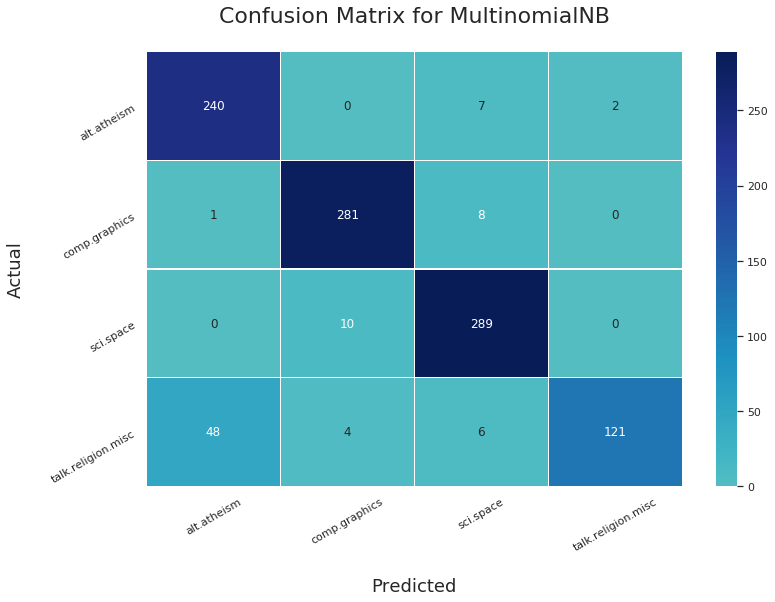

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
classifier = MultinomialNB()
clsfrName = 'MultinomialNB'
model(classifier, clsfrName)

**Train SVM and report confusion matrix.**

CPU times: user 7.83 s, sys: 0 ns, total: 7.83 s
Wall time: 7.83 s

Accuracy: 0.29400196656833827




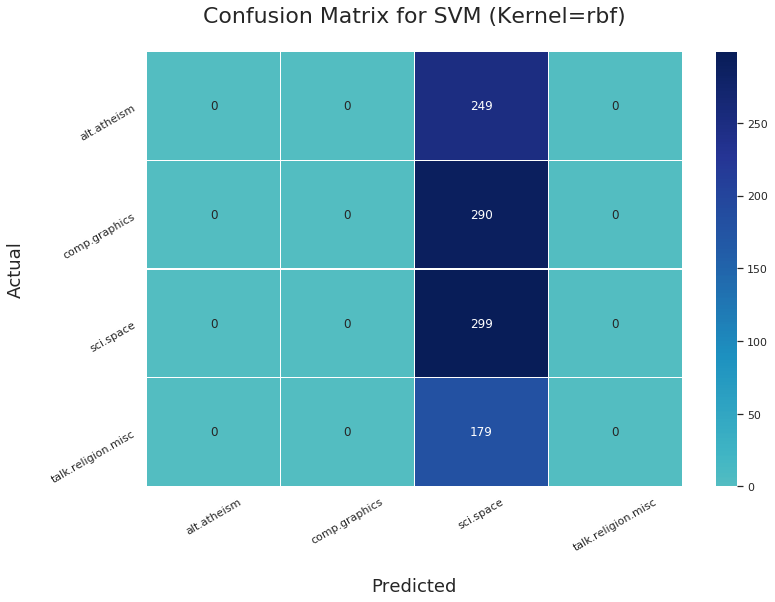

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = rbf
classifier = svm.SVC(gamma='auto', kernel='rbf')
clsfrName = 'SVM (Kernel=rbf)'
model(classifier,clsfrName)

CPU times: user 4.78 s, sys: 2.3 ms, total: 4.79 s
Wall time: 4.79 s

Accuracy: 0.9547689282202556




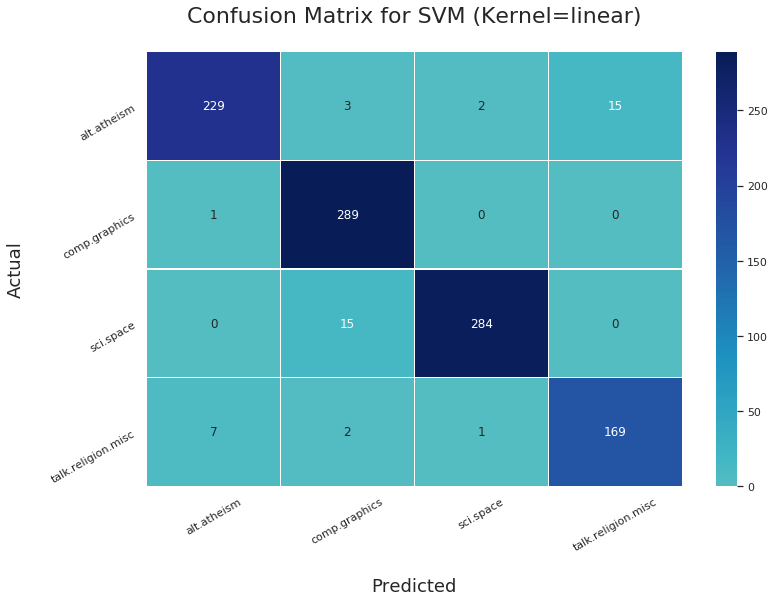

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = linear
classifier = svm.SVC(gamma = 'auto', kernel='linear')
clsfrName = 'SVM (Kernel=linear)'
model(classifier,clsfrName)

CPU times: user 7.69 s, sys: 0 ns, total: 7.69 s
Wall time: 7.7 s

Accuracy: 0.29400196656833827




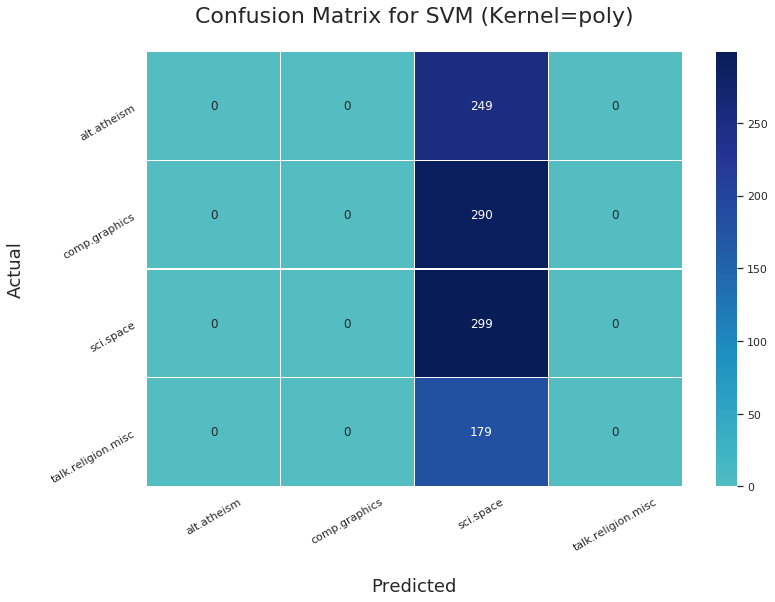

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = poly
classifier = svm.SVC(gamma = 'auto', kernel='poly')
clsfrName = 'SVM (Kernel=poly)'
model(classifier,clsfrName)

CPU times: user 7.74 s, sys: 0 ns, total: 7.74 s
Wall time: 7.75 s

Accuracy: 0.29400196656833827




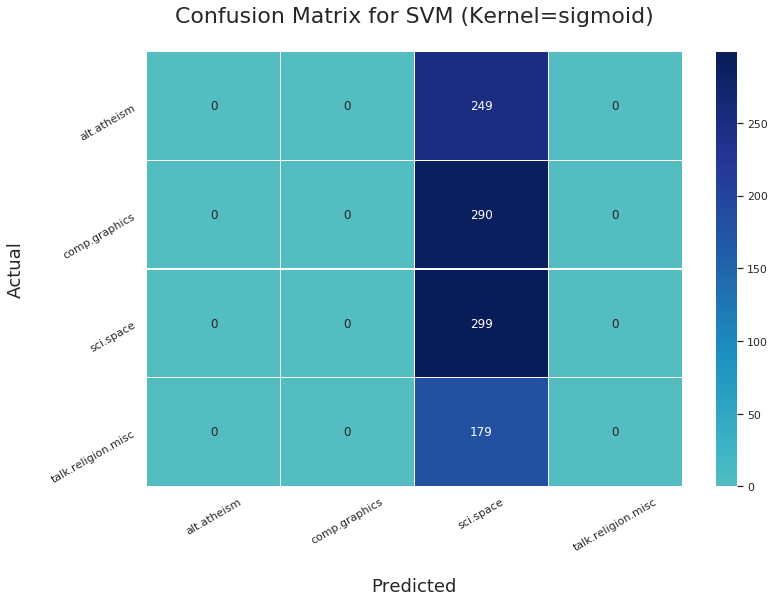

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = sigmoid
classifier = svm.SVC(gamma = 'auto', kernel='sigmoid')
clsfrName = 'SVM (Kernel=sigmoid)'
model(classifier,clsfrName)

**Hyperparameter Tuning using GridsearchCV**

In [0]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid 
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'shrinking': [True,False],
    'gamma': ['auto','scale']
}

# Create a base model
es = svm.SVC(gamma = 'scale', kernel='linear')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = es, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [0]:
a=grid_search.fit(X_train, y_train)
print()
print('Best Parameters')
grid_search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.9min finished



Best Parameters


{'C': 10, 'gamma': 'auto', 'shrinking': True}

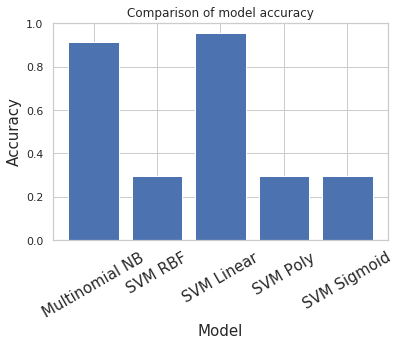

In [0]:
label = ['Multinomial NB', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'SVM Sigmoid']
index = np.arange(len(label))
plt.bar(index, results)
plt.xlabel('Model', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
plt.xticks(index, label, fontsize=15, rotation=30)
plt.title('Comparison of model accuracy')
plt.show()

results_old=results
results=[]

**Which algorithm has higher accuracy and why?**

1. The graph above compares the accuracy of various models.
2. The graph clearly shows that SVM with a linear kernel has the best accuracy (95%), followed by Multinomial NB at 91.54% and the other SVM models at 29.4%.
3. SVM with linear kernel performs better because TF-IDF matrix is a sparse matrix and SVM is known to work well with sparse data.

Source: https://datascience.stackexchange.com/questions/22137/svm-on-sparse-data/22151

**Does changing the kernel of the SVM change the accuracy or decrease confusion between classes?**

1. Yes, changing the kernel of SVM to linear increases the accuracy.
2. Kernel functions are used to plot a linear function on non-linear data.
3. However, in this case the data is already linearly separable. Thus, we don't need to plot the points in higher dimensions.
4. This is why SVM Linear Kernel gives best accuracy as compared to others.
5. It can also be observed that SVM Linear Kernel takes the least time as compared to any other kernels. It completed the process in 4.79 seconds. However, all other kernels took more than 7 seconds.
6. When using SVM, C i.e. Penalty Parameter is extremely important. The optimum selection of hyperparameters is an important factor to get better results. Using GridsearchCV, it is found that the best parameters for SVM with linear kernel are: {'C': 10, 'gamma': 'auto', 'shrinking': True}

**Analysis based on confusion matrix:**
      
1.   For rbf, poly and sigmoid kernels, only 299 correct predictions were made from the class: sci.space.
2.   For linear kernel, 229 from alt.atheism, 289 from comp.graphics, 284 from sci.space and 169 from talk.religion.misc correct predictions were made.
3. For linear kernel, the most wrong predictions having the cound of 15 were made from alt.atheism class which predicted to be talk.religion.misc.






**2. d) Perform part-of-speech tagging on the raw data (i.e. prior to cleaning it), clean as in part (a)above, and extract the nouns only to obtain a bag-of-words tf-idf weighted vector representationusing only the nouns. Repeat question (c).**

In [0]:
#Initialize empty lists
raw_pos_list  = []
ps = PorterStemmer() 

def remove_stop_words(list):
    return [f.lower() for f in list if f and f.lower() not in stopword_list]

def remove_non_leters(text):
  tokens =[re.sub(r'[^a-zA-Z]', '', word) for word in text if re.sub(r'[^a-zA-Z]', '', word)]
  return tokens
    
def stem_words(list):       
    return [ps.stem(token) for token in list] #[5]

#Loop through the dataset
for i, news in enumerate(dataset['data']):
  #tokenize each article
  tokens = word_tokenize(news)
  if (len(tokens)!=0):
    #Perform POS tagging and store in list
    raw_pos_list.append(nltk.pos_tag(tokens))

#Retaining only the nouns after POS Tagging
nouns_nly = ('NN', 'NNS', 'NNP', 'NNPS')
odd_fn = lambda x: x[1] in nouns_nly
filtered_pos_list=[list(filter(odd_fn, i)) for i in raw_pos_list] 

#Retaining just the words and remove the POS tags
remove_tags = lambda x:x[0]
new_tokens=[list(map(remove_tags, i)) for i in filtered_pos_list]

In [0]:
#Clean the data
removed_stop_words=[remove_stop_words(i) for i in new_tokens]
only_letters=[remove_non_leters(i) for i in removed_stop_words]
remove_stem_words=[stem_words(i) for i in only_letters]

In [0]:
cleaned_data=[TreebankWordDetokenizer().detokenize(i) for i in remove_stem_words]

#Vectorizer
feature_bow = vectorizer_bow.fit_transform(cleaned_data)

#TF-IDF
featureTfid_new = TransformTfid.fit_transform(feature_bow)

In [0]:
#Separating Train and Test data into a ratio of 70:30
features = featureTfid
targets = dataset.target
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3)

CPU times: user 9.58 ms, sys: 1.75 ms, total: 11.3 ms
Wall time: 18.4 ms

Accuracy: 0.9124877089478859




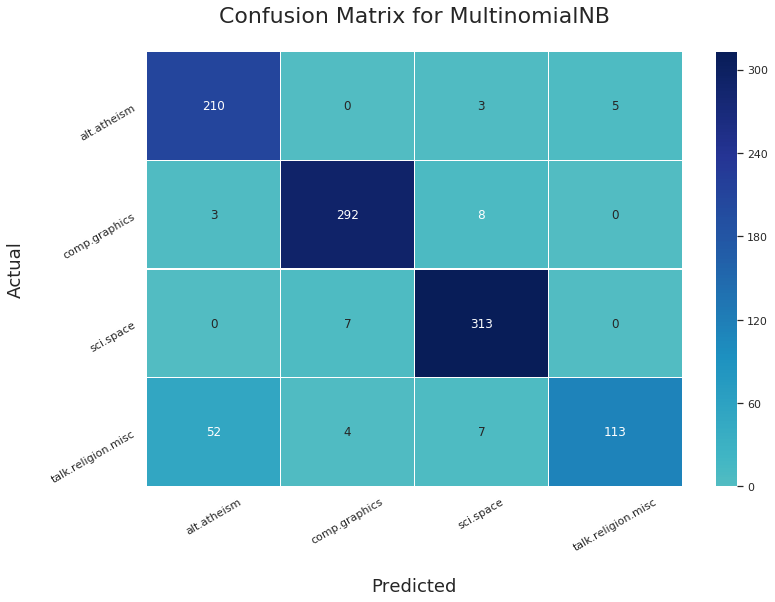

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
#MultinomialNB
classifier = MultinomialNB()
clsfrName = 'MultinomialNB'
model(classifier, clsfrName)

CPU times: user 7.93 s, sys: 1.84 ms, total: 7.93 s
Wall time: 7.93 s

Accuracy: 0.29793510324483774




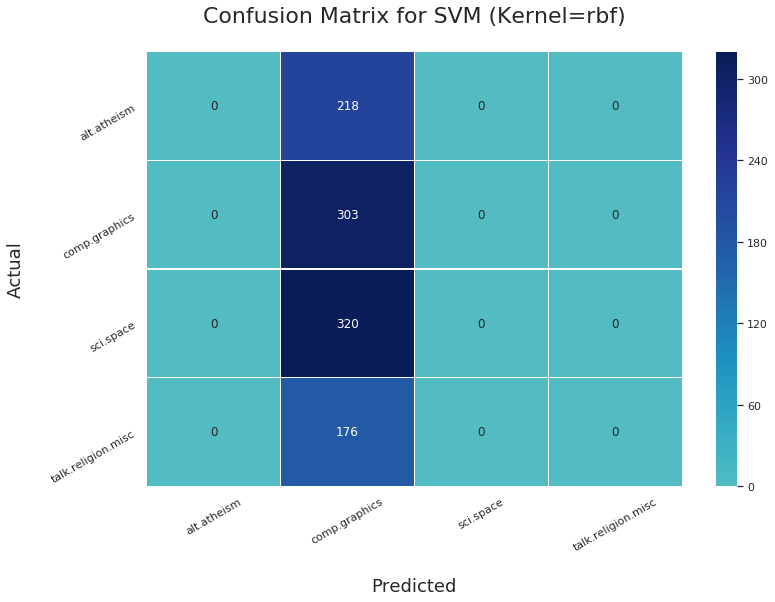

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = rbf
classifier = svm.SVC(gamma = 'auto', kernel='rbf')
clsfrName = 'SVM (Kernel=rbf)'
model(classifier,clsfrName)

CPU times: user 4.82 s, sys: 0 ns, total: 4.82 s
Wall time: 4.84 s

Accuracy: 0.9547689282202556




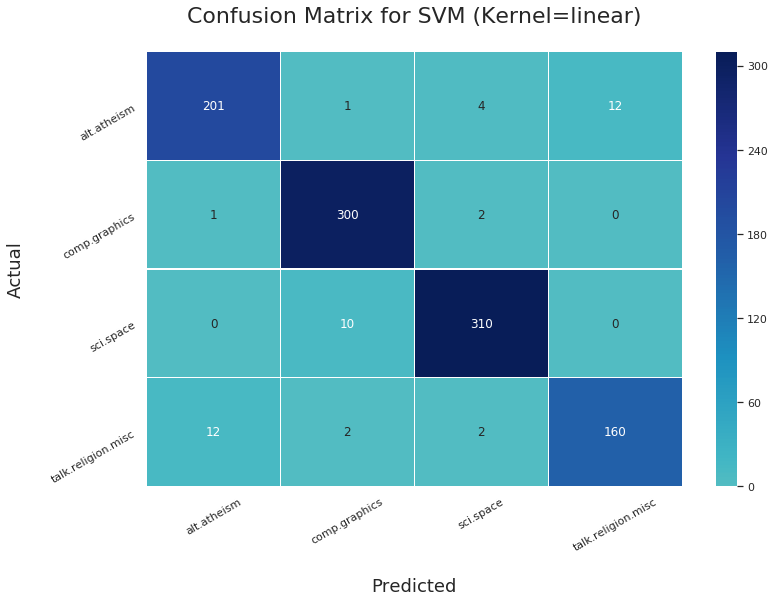

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = linear
classifier = svm.SVC(gamma = 'auto', kernel='linear')
clsfrName = 'SVM (Kernel=linear)'
model(classifier,clsfrName)

CPU times: user 7.84 s, sys: 0 ns, total: 7.84 s
Wall time: 7.85 s

Accuracy: 0.29793510324483774




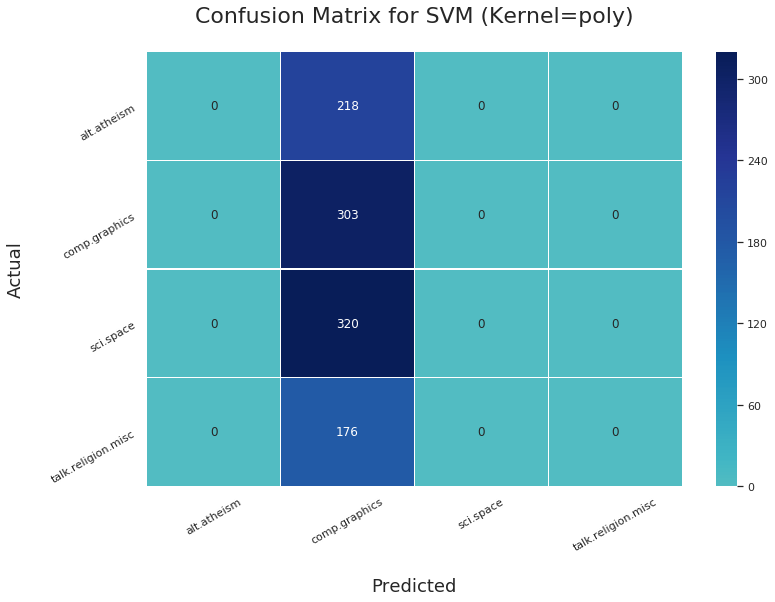

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = poly
classifier = svm.SVC(gamma = 'auto', kernel='poly')
clsfrName = 'SVM (Kernel=poly)'
model(classifier,clsfrName)

CPU times: user 7.85 s, sys: 0 ns, total: 7.85 s
Wall time: 7.85 s

Accuracy: 0.29793510324483774




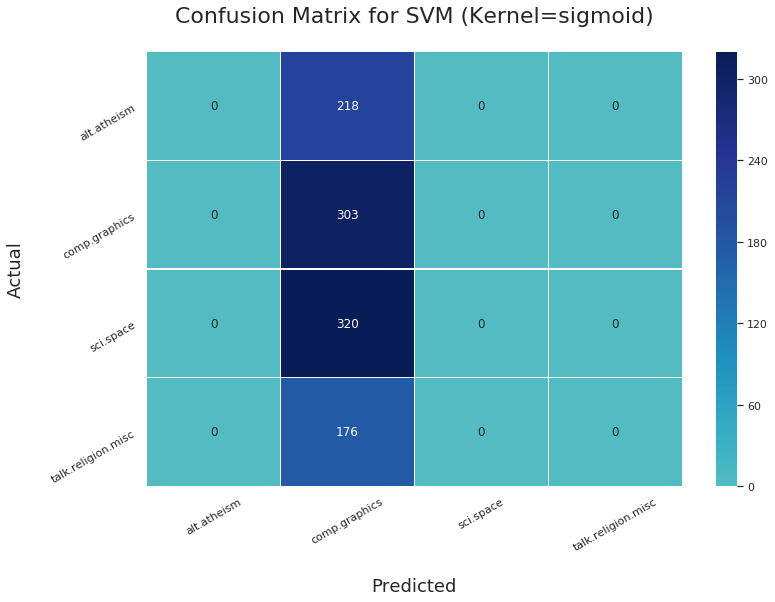

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#SVM with Kernel = sigmoid
classifier = svm.SVC(gamma = 'auto', kernel='sigmoid')
clsfrName = 'SVM (Kernel=sigmoid)'
model(classifier,clsfrName)

**How does this accuracy compare with that of part(c)?**

The accuracy is almost same for both the cases, with a very slight improvement in the second case. The comparison of the accuracies is clearly shown in the graph below. From this we can infer that instead of using the entire dataset, we can reduce the dimensionality (by extracting nouns) and perform text classification to get similar results.

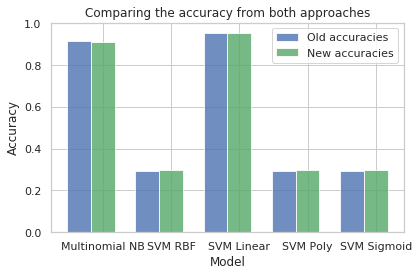

In [0]:
#Source https://pythonspot.com/matplotlib-bar-chart/
# data to plot

n_groups = 5

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, results_old, bar_width,
alpha=opacity,
color='b',
label='Old accuracies')

rects2 = plt.bar(index + bar_width, results, bar_width,
alpha=opacity,
color='g',
label='New accuracies')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparing the accuracy from both approaches')
plt.xticks(index + bar_width, ('Multinomial NB', 'SVM RBF', 'SVM Linear', 'SVM Poly', 'SVM Sigmoid'))
plt.legend()

plt.tight_layout()
plt.show()

**How does the size of the vocabulary compare with that of part (c)?**

The size of the data is significantly reduced in the second case, which is learly evident from the shape of the vocabulary. Previously we had 3387 documents and 27378 words. However, in the new scenario, the number of documents remain the same but since we consider only nouns, the number of words reduces to 25209 words. This shows that size of dataset has been reduced.

In [0]:
print(style.BOLD+style.UNDERLINE+"Shape of original TF-IDF matrix"+style.END)
print(featureTfid.shape)
print(style.BOLD+style.UNDERLINE+"Shape of new TF-IDF matrix"+style.END)
print(featureTfid_new.shape)

Shape of original TF-IDF matrix
(3387, 27378)
Shape of new TF-IDF matrix
(3387, 25209)


**References**

[1] https://stackoverflow.com/questions/8924173/how-do-i-print-bold-text-in-python/11784589


[2] https://towardsdatascience.com/multiclass-classification-with-word-bags-and-word-sequences-4fffd4d62e0c

[3] https://colab.research.google.com/drive/17LMCbDOnny8h1KTqqoX3smy6US6z1vki#scrollTo=p_DAqSiojSJd

[4] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html

[5] https://stackoverflow.com/questions/21948019/python-untokenize-a-sentence

[6] https://towardsdatascience.com/3-basic-approaches-in-bag-of-words-which-are-better-than-word-embeddings-c2cbc7398016